In [134]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\admin\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


ModuleNotFoundError: No module named 'pydotplus'

In [99]:
url='https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv'

In [100]:
titanic = pd.read_csv(url)

In [101]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [103]:
titanic=titanic.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin', 'Embarked'])

In [104]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [105]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [106]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [107]:
titanic.isnull().sum().sum()

177

In [108]:
import seaborn as sns

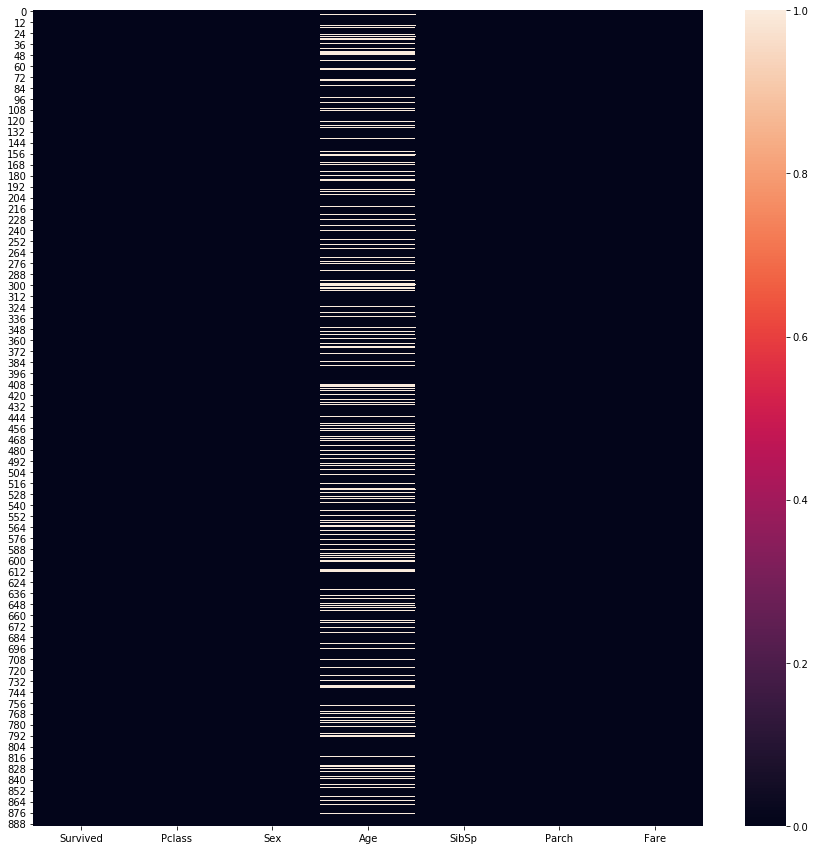

In [109]:
plt.figure(figsize=(15,15))
sns.heatmap(titanic.isnull())

In [110]:
null_var = titanic.isnull().sum()/titanic.shape[0] *100
null_var

Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
SibSp        0.00000
Parch        0.00000
Fare         0.00000
dtype: float64

In [111]:
from sklearn.preprocessing import OneHotEncoder

In [112]:
oh_enc = OneHotEncoder(sparse=False)

In [113]:
oh_enc_arr = oh_enc.fit_transform(titanic[['Sex']])
oh_enc_arr

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [114]:
oh_enc_df = pd.DataFrame(oh_enc_arr, columns=[  'female', 'male'])
oh_enc_df

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [115]:
new_data_titanic=titanic.drop(columns=['Sex'])

In [116]:
new_data_titanic['male']=oh_enc_df['male'].to_list()
new_data_titanic['female']=oh_enc_df['female'].to_list()
new_data_titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,male,female
0,0,3,22.0,1,0,7.2500,1.0,0.0
1,1,1,38.0,1,0,71.2833,0.0,1.0
2,1,3,26.0,0,0,7.9250,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1.0,0.0
887,1,1,19.0,0,0,30.0000,0.0,1.0
888,0,3,NaN,1,2,23.4500,0.0,1.0
889,1,1,26.0,0,0,30.0000,1.0,0.0


In [117]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [118]:
imputer_mean = SimpleImputer(strategy='mean')

imputer_mean

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [119]:
imputer_mode.fit(new_data_titanic)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [120]:
imputer_mode.statistics_

array([ 0.38383838,  2.30864198, 29.69911765,  0.52300786,  0.38159371,
       32.20420797,  0.64758698,  0.35241302])

In [121]:
new_data_titanic = imputer_mode.transform(new_data_titanic)

In [122]:
titanic.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [123]:
new_data_titanic1 = pd.DataFrame(new_data_titanic,columns=['Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare','male','female'])

In [124]:
new_data_titanic1.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
female      0
dtype: int64

In [125]:
new_data_titanic1.isnull().sum().sum()

0

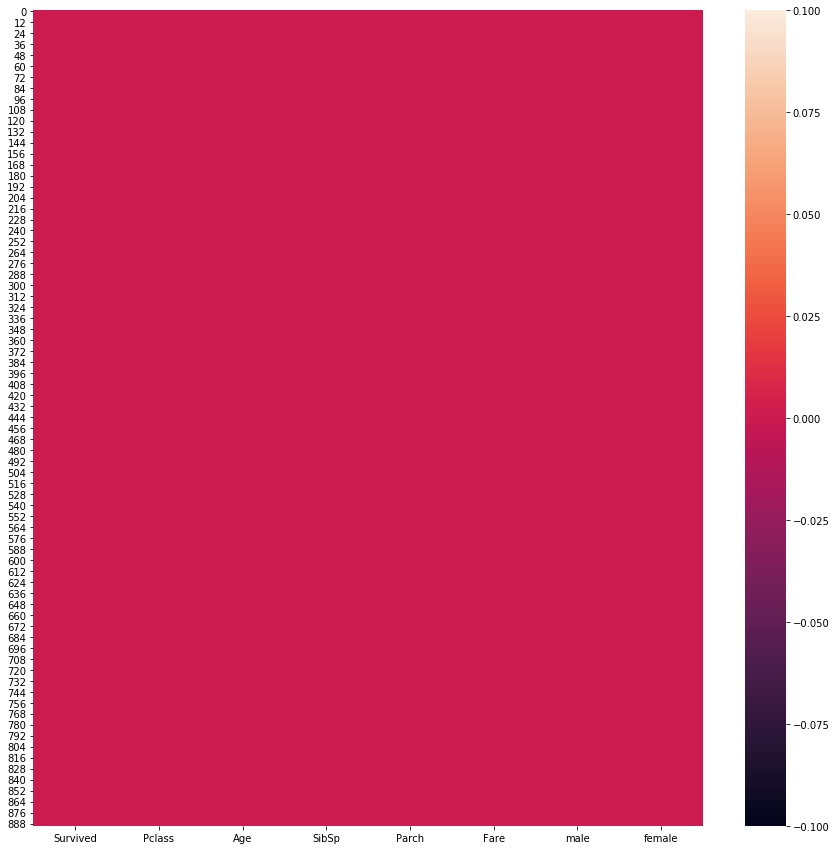

In [126]:
plt.figure(figsize=(15,15))
sns.heatmap(new_data_titanic1.isnull())

In [127]:
new_data_titanic1.dtypes

Survived    float64
Pclass      float64
Age         float64
SibSp       float64
Parch       float64
Fare        float64
male        float64
female      float64
dtype: object

In [128]:
new_data_titanic1.keys()

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male',
       'female'],
      dtype='object')

In [129]:
new_data_titanic1.head

<bound method NDFrame.head of      Survived  Pclass        Age  SibSp  Parch     Fare  male  female
0         0.0     3.0  22.000000    1.0    0.0   7.2500   1.0     0.0
1         1.0     1.0  38.000000    1.0    0.0  71.2833   0.0     1.0
2         1.0     3.0  26.000000    0.0    0.0   7.9250   0.0     1.0
3         1.0     1.0  35.000000    1.0    0.0  53.1000   0.0     1.0
4         0.0     3.0  35.000000    0.0    0.0   8.0500   1.0     0.0
..        ...     ...        ...    ...    ...      ...   ...     ...
886       0.0     2.0  27.000000    0.0    0.0  13.0000   1.0     0.0
887       1.0     1.0  19.000000    0.0    0.0  30.0000   0.0     1.0
888       0.0     3.0  29.699118    1.0    2.0  23.4500   0.0     1.0
889       1.0     1.0  26.000000    0.0    0.0  30.0000   1.0     0.0
890       0.0     3.0  32.000000    0.0    0.0   7.7500   1.0     0.0

[891 rows x 8 columns]>

In [130]:
X = new_data_titanic1.drop(columns = 'Survived')
y = new_data_titanic1['Survived']

In [135]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [136]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [137]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'female']

In [138]:
clf.score(x_train,y_train)

0.985553772070626

In [139]:
py_pred = clf.predict(x_test)

In [140]:
clf.score(x_test,y_test)

0.7276119402985075

In [141]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [142]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

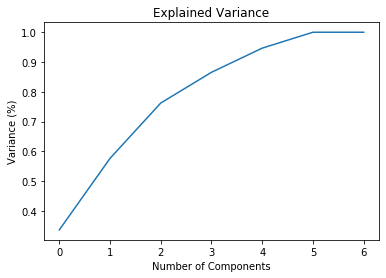

In [143]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [144]:
pca = PCA(n_components=5)
new_data3 = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data3,columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])

In [145]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5
0,-1.184296,-1.009306,0.269638,0.257530,-0.461028
1,2.019051,1.522341,-0.439666,0.055767,-0.912611
2,0.999109,-0.658984,-1.875385,0.104986,-0.145578
3,1.924202,1.252831,-0.582255,0.111506,-0.903739
4,-1.491131,-0.167078,-0.274206,-0.323107,0.079049
...,...,...,...,...,...
886,-1.165379,0.279437,0.056636,0.433565,0.101382
887,1.665818,0.703838,-1.160830,1.149754,-0.160332
888,2.151852,-1.305227,-0.240805,-1.151140,0.922333
889,-0.811398,1.111974,0.451430,0.844141,0.079497


In [146]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7313432835820896

In [148]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [149]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [150]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [151]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 9, 'min_samples_split': 5, 'splitter': 'random'}


In [152]:
grid_search.best_score_

0.8122451612903226

In [155]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =15, min_samples_leaf= 9, min_samples_split= 5, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [156]:
clf.score(x_test,y_test)*100

79.8507462686567